# Spotify Analysis: Data Cleaning and EDA

This notebook performs data cleaning and exploratory data analysis on the Spotify dataset to compare pop genres and popularity.


## Project Overview
We chose the Spotify Tracks Dataset to analyze the factors that affect the popularity of a song. From the column descriptions: 

"popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity."

Thus, we want to analyze the factors that determine this popularity, such as artist, danceability, energy, key, loudness, mode, tempo, etc. Then, we will test our model to see if it can ascertain the correct probability in the validation and testing datasets, and see if our model matches the provided algorithm. We will specifically be analyzing songs in the "pop" genre, combining pop, mando-pop, k-pop, etc.

## Import Required Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [6]:
print("Columns in dataset:")
print(df.columns.tolist())
print(df.dtypes)

Columns in dataset:
['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [7]:
genre_counts = df['track_genre'].value_counts()
print(f"Most popular genre: {genre_counts.index[0]}")
print(f"Number of tracks: {genre_counts.iloc[0]}")
print("\nTop 10 genres by number of tracks:")
print(genre_counts.head(10))

Most popular genre: acoustic
Number of tracks: 1000

Top 10 genres by number of tracks:
track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
anime          1000
black-metal    1000
bluegrass      1000
blues          1000
brazil         1000
Name: count, dtype: int64


In [8]:
num_genres = df['track_genre'].nunique()
print(f"Total number of unique genres: {num_genres}")

Total number of unique genres: 114


In [9]:
all_genres = sorted(df['track_genre'].unique())
print("All 114 genres:")
for i, genre in enumerate(all_genres, 1):
    print(f"{i}. {genre}")

All 114 genres:
1. acoustic
2. afrobeat
3. alt-rock
4. alternative
5. ambient
6. anime
7. black-metal
8. bluegrass
9. blues
10. brazil
11. breakbeat
12. british
13. cantopop
14. chicago-house
15. children
16. chill
17. classical
18. club
19. comedy
20. country
21. dance
22. dancehall
23. death-metal
24. deep-house
25. detroit-techno
26. disco
27. disney
28. drum-and-bass
29. dub
30. dubstep
31. edm
32. electro
33. electronic
34. emo
35. folk
36. forro
37. french
38. funk
39. garage
40. german
41. gospel
42. goth
43. grindcore
44. groove
45. grunge
46. guitar
47. happy
48. hard-rock
49. hardcore
50. hardstyle
51. heavy-metal
52. hip-hop
53. honky-tonk
54. house
55. idm
56. indian
57. indie
58. indie-pop
59. industrial
60. iranian
61. j-dance
62. j-idol
63. j-pop
64. j-rock
65. jazz
66. k-pop
67. kids
68. latin
69. latino
70. malay
71. mandopop
72. metal
73. metalcore
74. minimal-techno
75. mpb
76. new-age
77. opera
78. pagode
79. party
80. piano
81. pop
82. pop-film
83. power-pop
84. pr

In [10]:
pop_genres = [genre for genre in all_genres if 'pop' in genre.lower()]
print(f"Number of genres containing 'pop': {len(pop_genres)}")
print("\nGenres with 'pop' in the name:")
for genre in pop_genres:
    print(f"  - {genre}")

Number of genres containing 'pop': 9

Genres with 'pop' in the name:
  - cantopop
  - indie-pop
  - j-pop
  - k-pop
  - mandopop
  - pop
  - pop-film
  - power-pop
  - synth-pop


In [11]:
pop_df = df[df['track_genre'].isin(pop_genres)]
print(f"Total tracks in pop genres: {len(pop_df)}")
print(f"Shape of pop dataset: {pop_df.shape}")

pop_df.to_csv('pop_genres_dataset.csv', index=False)
print("\nSaved pop genres dataset to 'pop_genres_dataset.csv'")

Total tracks in pop genres: 9000
Shape of pop dataset: (9000, 21)

Saved pop genres dataset to 'pop_genres_dataset.csv'

Saved pop genres dataset to 'pop_genres_dataset.csv'


In [12]:
pop_df_cleaned = pop_df.drop(columns=['track_id', 'album_name', 'Unnamed: 0'])
pop_df_cleaned['explicit'] = pop_df_cleaned['explicit'].astype(int)
pop_df_cleaned.to_csv('pop_genres_dataset.csv', index=False)
print(f"Cleaned dataset: {pop_df_cleaned.shape}")
print(f"Columns: {pop_df_cleaned.columns.tolist()}")

Cleaned dataset: (9000, 18)
Columns: ['artists', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [13]:
print("Popularity IQR for each pop genre:")
print("="*60)

pop_iqr_data = []
for genre in sorted(pop_genres):
    genre_data = pop_df[pop_df['track_genre'] == genre]['popularity']
    q1 = genre_data.quantile(0.25)
    q3 = genre_data.quantile(0.75)
    iqr = q3 - q1
    median = genre_data.median()
    mean = genre_data.mean()
    
    pop_iqr_data.append({
        'genre': genre,
        'Q1': q1,
        'Q3': q3,
        'IQR': iqr,
        'median': median,
        'mean': mean
    })
    
    print(f"\n{genre}:")
    print(f"  Q1 (25th percentile): {q1:.2f}")
    print(f"  Q3 (75th percentile): {q3:.2f}")
    print(f"  IQR: {iqr:.2f}")
    print(f"  Median: {median:.2f}")
    print(f"  Mean: {mean:.2f}")

iqr_summary_df = pd.DataFrame(pop_iqr_data)
print("\n" + "="*60)
print("\nSummary Table:")
print(iqr_summary_df.to_string(index=False))

Popularity IQR for each pop genre:

cantopop:
  Q1 (25th percentile): 22.00
  Q3 (75th percentile): 47.00
  IQR: 25.00
  Median: 35.00
  Mean: 34.74

indie-pop:
  Q1 (25th percentile): 0.00
  Q3 (75th percentile): 66.00
  IQR: 66.00
  Median: 47.00
  Mean: 40.66

j-pop:
  Q1 (25th percentile): 36.00
  Q3 (75th percentile): 58.00
  IQR: 22.00
  Median: 41.00
  Mean: 41.14

k-pop:
  Q1 (25th percentile): 48.00
  Q3 (75th percentile): 69.00
  IQR: 21.00
  Median: 60.00
  Mean: 56.90

mandopop:
  Q1 (25th percentile): 40.00
  Q3 (75th percentile): 54.00
  IQR: 14.00
  Median: 49.00
  Mean: 45.02

pop:
  Q1 (25th percentile): 2.00
  Q3 (75th percentile): 71.00
  IQR: 69.00
  Median: 66.00
  Mean: 47.58

pop-film:
  Q1 (25th percentile): 57.00
  Q3 (75th percentile): 64.00
  IQR: 7.00
  Median: 60.00
  Mean: 59.28

power-pop:
  Q1 (25th percentile): 21.00
  Q3 (75th percentile): 27.00
  IQR: 6.00
  Median: 23.00
  Mean: 26.90

synth-pop:
  Q1 (25th percentile): 24.00
  Q3 (75th percentile): 

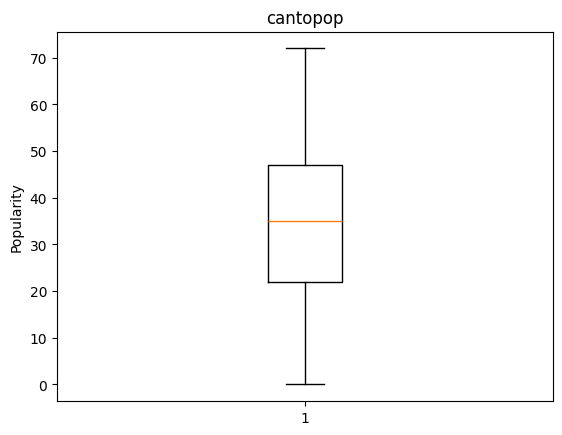

In [14]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'cantopop']['popularity'])
plt.title('cantopop')
plt.ylabel('Popularity')
plt.show()

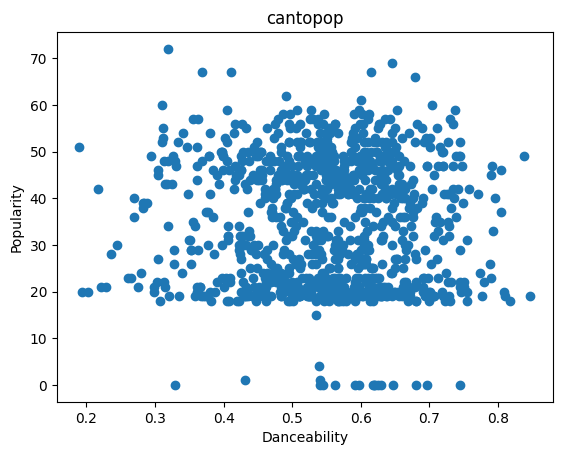

In [15]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'cantopop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('cantopop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

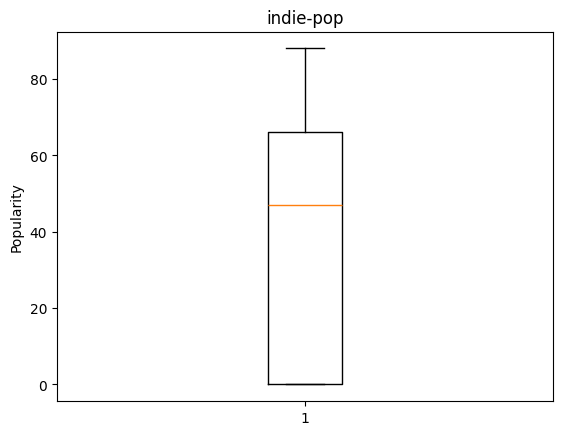

In [16]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'indie-pop']['popularity'])
plt.title('indie-pop')
plt.ylabel('Popularity')
plt.show()

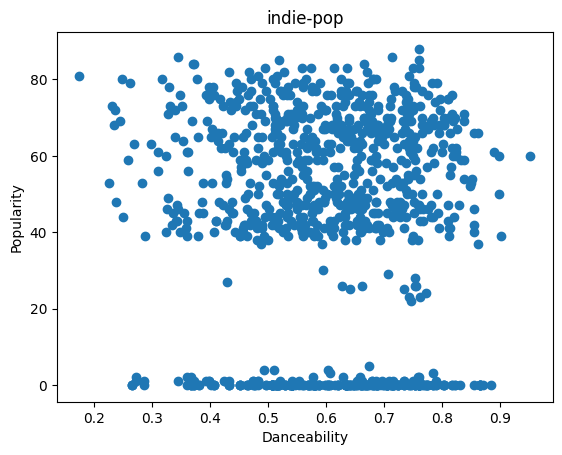

In [17]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'indie-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('indie-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

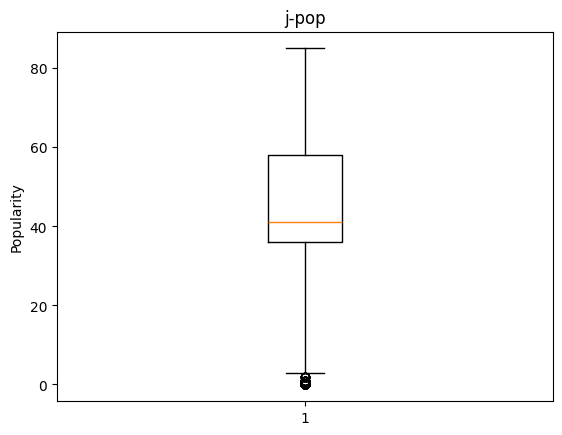

In [18]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'j-pop']['popularity'])
plt.title('j-pop')
plt.ylabel('Popularity')
plt.show()

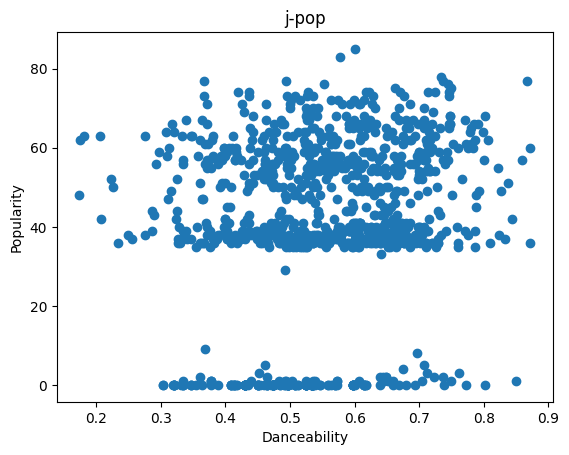

In [19]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'j-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('j-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

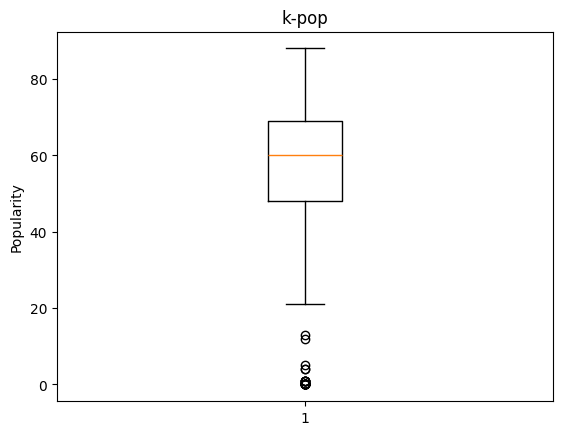

In [20]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'k-pop']['popularity'])
plt.title('k-pop')
plt.ylabel('Popularity')
plt.show()

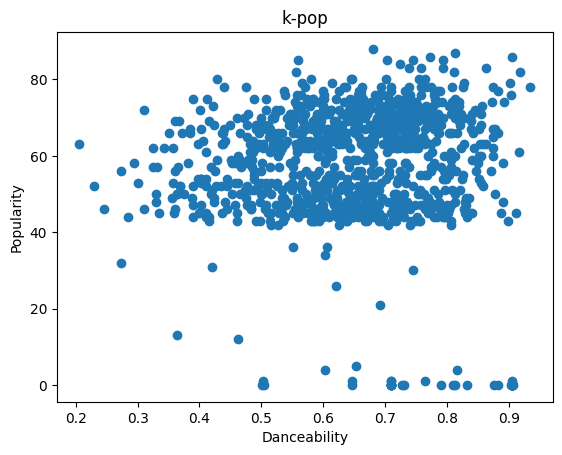

In [21]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'k-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('k-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

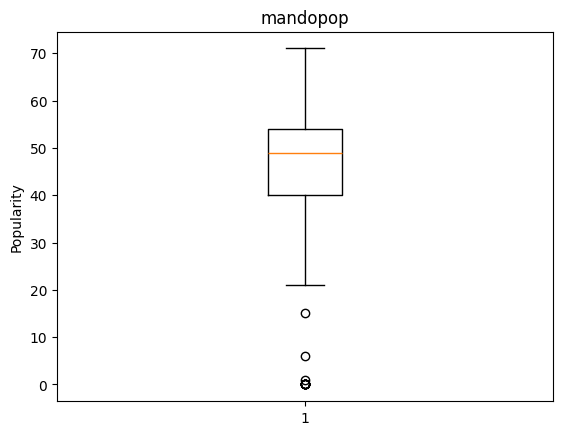

In [22]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'mandopop']['popularity'])
plt.title('mandopop')
plt.ylabel('Popularity')
plt.show()

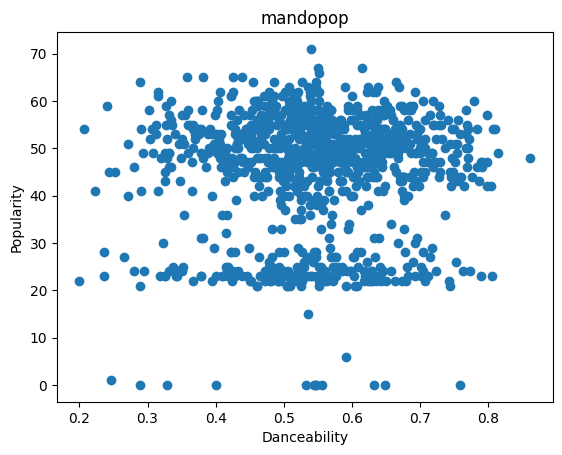

In [23]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'mandopop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('mandopop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

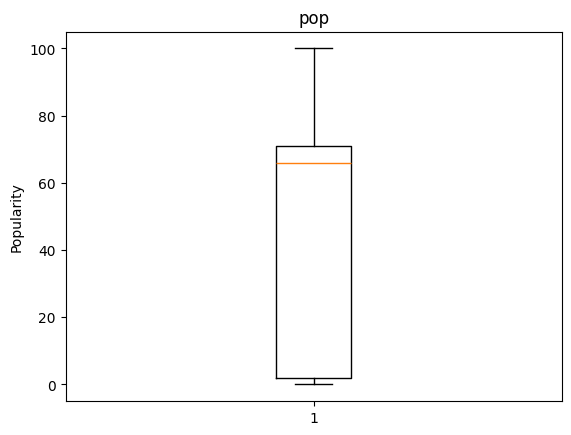

In [24]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'pop']['popularity'])
plt.title('pop')
plt.ylabel('Popularity')
plt.show()

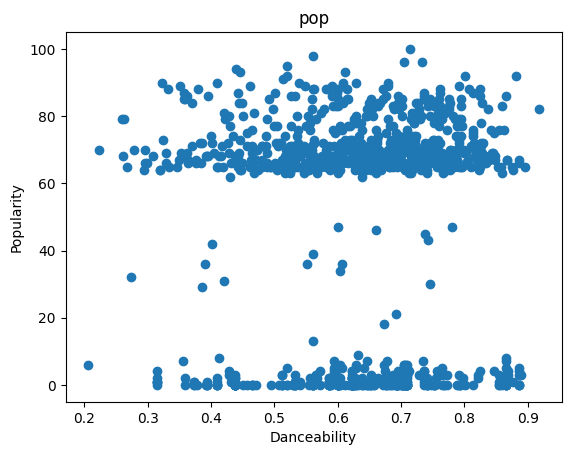

In [25]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

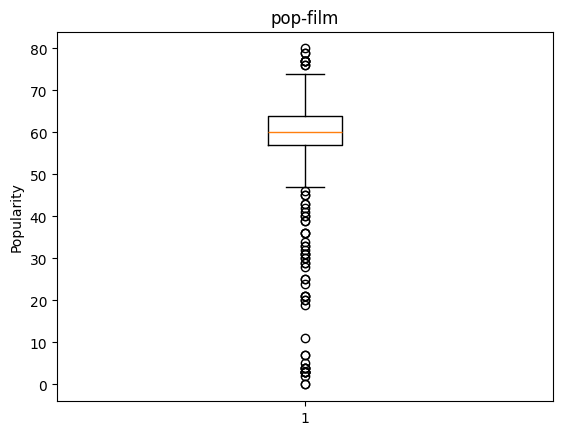

In [26]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'pop-film']['popularity'])
plt.title('pop-film')
plt.ylabel('Popularity')
plt.show()

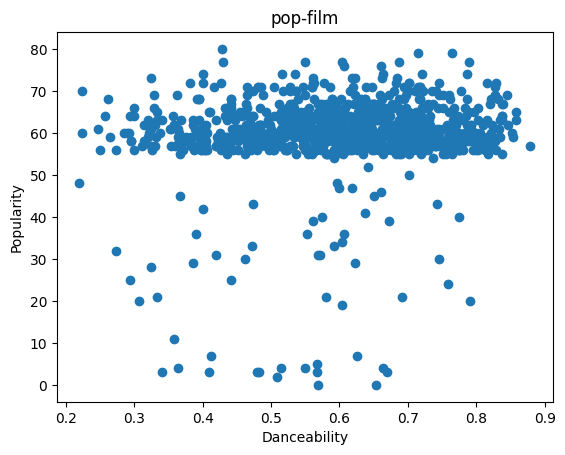

In [27]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'pop-film']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('pop-film')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

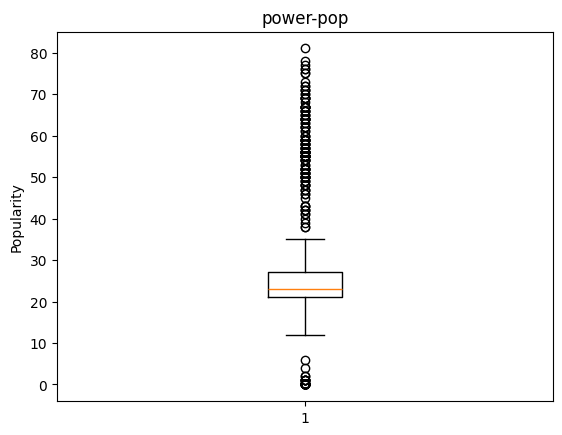

In [28]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'power-pop']['popularity'])
plt.title('power-pop')
plt.ylabel('Popularity')
plt.show()

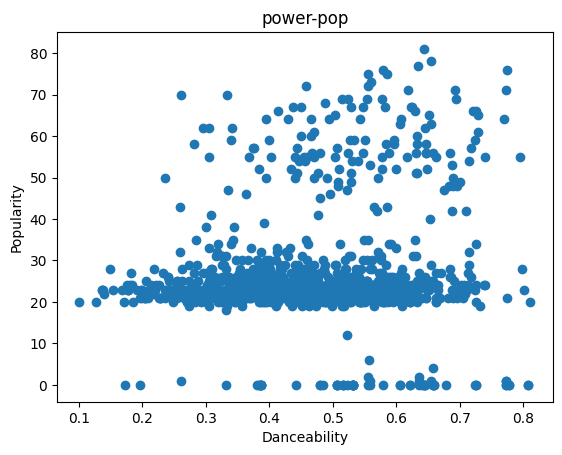

In [29]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'power-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('power-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

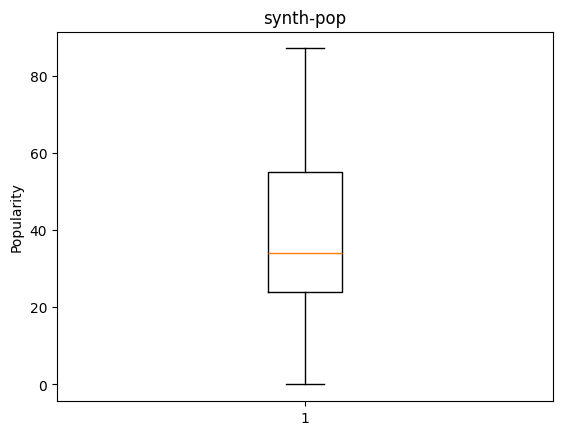

In [30]:
plt.boxplot(pop_df_cleaned[pop_df_cleaned['track_genre'] == 'synth-pop']['popularity'])
plt.title('synth-pop')
plt.ylabel('Popularity')
plt.show()

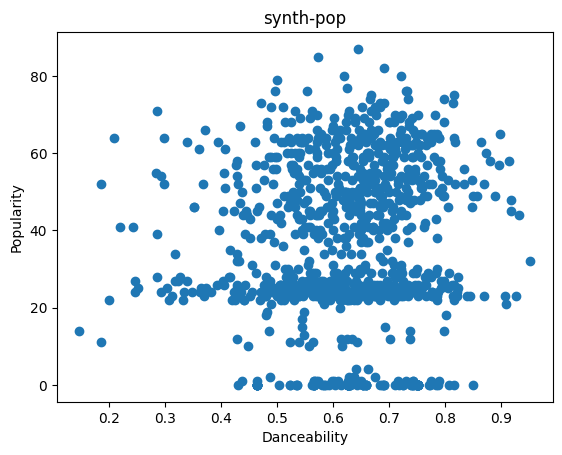

In [31]:
genre_data = pop_df_cleaned[pop_df_cleaned['track_genre'] == 'synth-pop']
plt.scatter(genre_data['danceability'], genre_data['popularity'])
plt.title('synth-pop')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

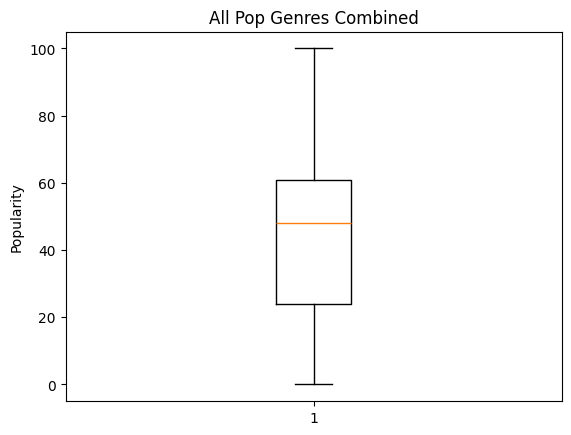

In [32]:
plt.boxplot(pop_df_cleaned['popularity'])
plt.title('All Pop Genres Combined')
plt.ylabel('Popularity')
plt.show()

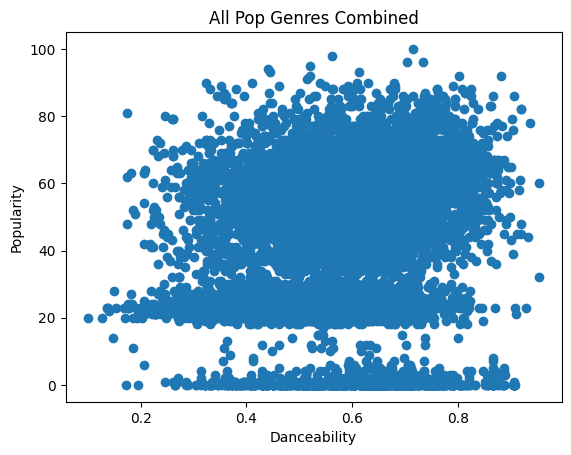

In [33]:
plt.scatter(pop_df_cleaned['danceability'], pop_df_cleaned['popularity'])
plt.title('All Pop Genres Combined')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

In [35]:
# Save the cleaned dataframe to CSV
pop_df_cleaned.to_csv('pop_genres_cleaned_dataset.csv', index=False)


In [ ]:
pop_df_